## Clustering - K Means Clustering

**Machine Learning can be classified into the following 3 types.**

1. **Supervised Learning** - It consists of **Classification** and **Regression Models**.

2. **Unsupervised Learning** - We focus on **Clustering** as we don't have a defined target and the model formed thereby, clusters the data based on the inter-relationship of the features. For clustering we don't have pre-determined classes. It can be utilized based on the dataset. **Cluster** is a segment which is created by separating dataset into smaller segments based on the features.

3. **Reinforcement Learning**

**Different Clustering Techniques**

**1. K-Means Clustering** - We fix a value of **K (no of clusters)**. This generates **k centroids** randomly. Next the distance of the data point is calculated from each centroids. The distance which is smaller with respect to both centroids is calculated and the data point is allocated to the corresponding centroid. Once the clusters are found, the mean distance of all the data points within the cluster is calculated, such that a new cluster centroid is formed, which leads to **re-allocation** of the data points within the cluster. This process takes place till the time, there is no **re-allocation** of the data points. It means the distance achieved for the data points are minimum.

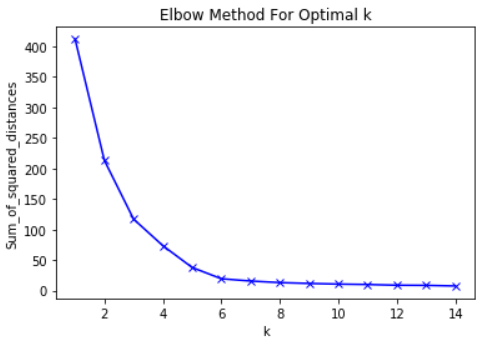

**In the Elbow Method, the graph is plotted between the *Sum of squared distances* vs the *k value (no of clusters)*. In this the optimal value of k is calculated based on the graph.**

**Silhouette method**

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a

Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b

The value of the Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

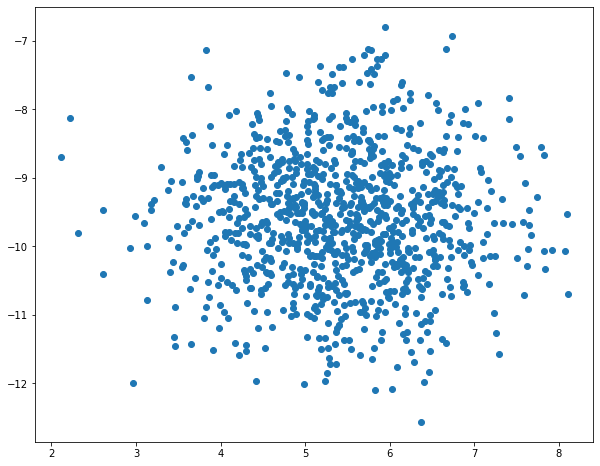

In [11]:
# Taking the no of centers to be 1

plt.figure (figsize = (10, 8))
X, y = make_blobs (n_samples = 1000, n_features = 2, centers = 1, random_state = 10)
plt.scatter(X[:, 0], X[:, 1]);

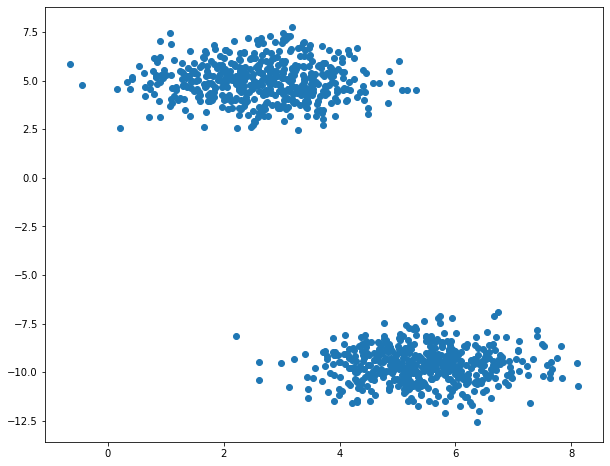

In [12]:
# Taking the no of centers to be 2

plt.figure (figsize = (10, 8))
X, y = make_blobs (n_samples = 1000, n_features = 2, centers = 2, random_state = 10)
plt.scatter(X[:, 0], X[:, 1]);

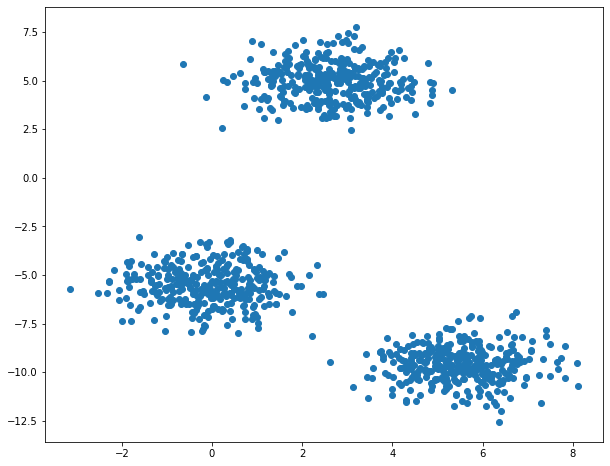

In [13]:
# Taking the no of centers to be 3

plt.figure (figsize = (10, 8))
X, y = make_blobs (n_samples = 1000, n_features = 2, centers = 3, random_state = 10)
plt.scatter(X[:, 0], X[:, 1]);

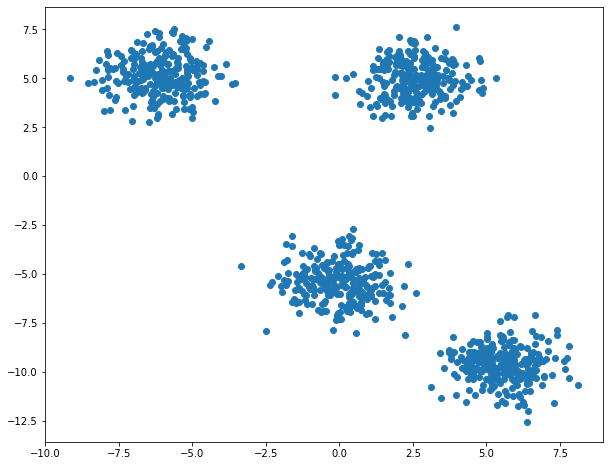

In [14]:
# Taking the no of centers to be 4

plt.figure (figsize = (10, 8))
X, y = make_blobs (n_samples = 1000, n_features = 2, centers = 4, random_state = 10)
plt.scatter(X[:, 0], X[:, 1]);

### Implementing K - Means on the dataset

**Elbow Method for finding k**

D:\Coding\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


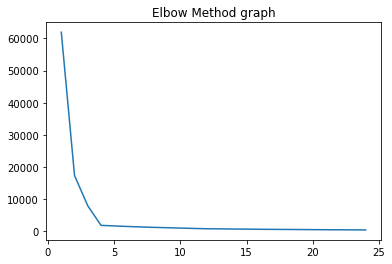

In [21]:
from sklearn.cluster import KMeans

SSD = []
for k in range (1, 25):
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(X)
    SSD.append(kmeans.inertia_) # inertia_ provides the sum of the squares of the distances.
plt.plot(range(1,25), SSD);
plt.title ('Elbow Method graph');

**From the graph, it is seen that the best value of k = 4.**

### Silhouette Method

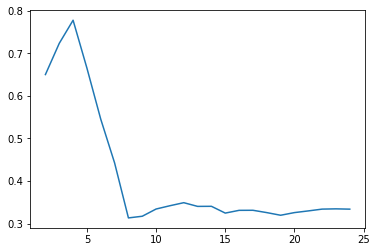

In [23]:
from sklearn.metrics import silhouette_score

SS = []
for k in range (2, 25):
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(X)
    SS.append(silhouette_score(X, kmeans.predict(X)))
plt.plot(range (2, 25), SS);

**From the above graph, we can verify that the best value of k = 4.**

### Building the best model

In [24]:
k_best = KMeans(n_clusters = 4, random_state = 10)
k_best.fit(X)
clust_pred = k_best.predict(X)
clust_pred

array([1, 2, 2, 1, 3, 3, 0, 3, 1, 2, 3, 1, 2, 0, 2, 0, 2, 2, 1, 0, 0, 3,
       0, 3, 2, 2, 3, 2, 1, 1, 1, 1, 3, 0, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 0, 2, 3, 3, 1, 3, 1, 3, 0, 1, 2, 2, 1, 3, 1, 3, 0, 2, 2, 2,
       1, 2, 1, 3, 1, 0, 3, 2, 0, 1, 0, 2, 2, 3, 1, 1, 1, 1, 2, 3, 3, 0,
       0, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 3, 2, 3, 0, 1,
       0, 3, 3, 3, 0, 2, 3, 3, 3, 1, 0, 3, 3, 0, 2, 2, 3, 1, 1, 2, 0, 3,
       2, 3, 0, 0, 2, 3, 2, 0, 2, 3, 2, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2,
       2, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 1, 2, 3, 2, 0, 2, 2, 1, 0, 0,
       3, 2, 2, 1, 3, 3, 3, 1, 1, 3, 2, 1, 2, 2, 3, 2, 2, 3, 2, 3, 2, 0,
       1, 1, 0, 1, 2, 3, 0, 2, 3, 1, 2, 2, 1, 1, 0, 3, 3, 3, 2, 2, 1, 3,
       3, 2, 1, 1, 3, 1, 3, 0, 2, 1, 1, 3, 0, 3, 3, 1, 2, 3, 1, 0, 2, 1,
       2, 0, 1, 0, 0, 2, 2, 0, 0, 3, 1, 0, 2, 3, 0, 1, 2, 3, 0, 2, 0, 0,
       1, 0, 2, 2, 1, 3, 1, 2, 1, 1, 2, 3, 1, 1, 1, 0, 0, 3, 0, 1, 0, 0,
       0, 3, 0, 0, 1, 0, 2, 2, 3, 3, 3, 0, 3, 2, 1,

In [25]:
k_best.cluster_centers_

array([[ 2.57427374,  4.9551547 ],
       [ 5.54690135, -9.62123904],
       [-6.10307996,  5.14422118],
       [-0.03749354, -5.43011018]])

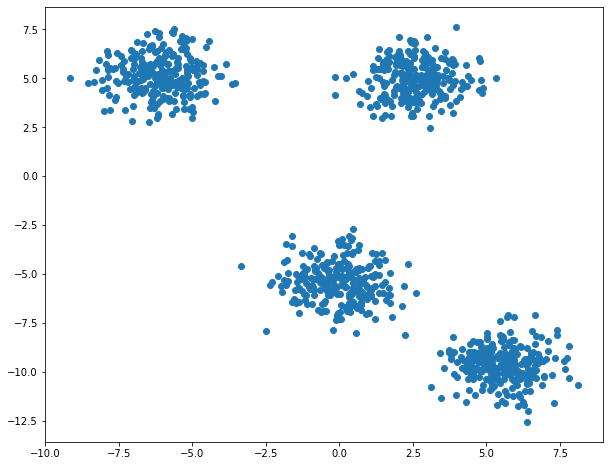

In [26]:
plt.figure (figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1]);

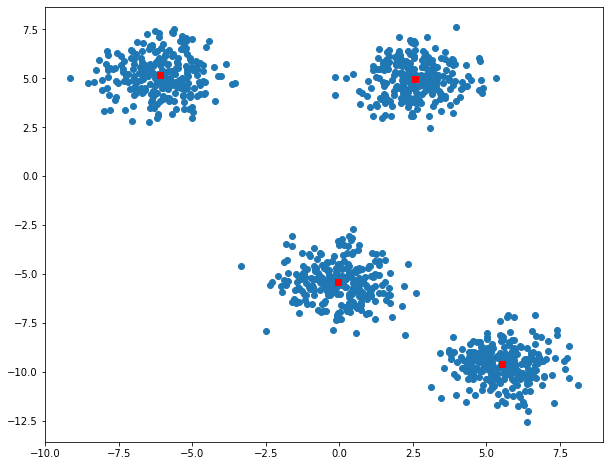

In [29]:
plt.figure (figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1]);
plt.plot (2.57427374,  4.9551547, c = 'r', marker = 's');
plt.plot(5.54690135, -9.62123904, c = 'r', marker = 's');
plt.plot(-6.10307996,  5.14422118, c = 'r', marker = 's');
plt.plot(-0.03749354, -5.43011018, c = 'r', marker = 's');

### K-Means for a standard dataset

In [30]:
from sklearn.datasets import load_iris

In [31]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [33]:
# Converting to dataframe

x = pd.DataFrame(iris['data'], columns=['SL','SW','PL','PW'])
x

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
# Standardisation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### Finding K using Elbow Method

D:\Coding\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


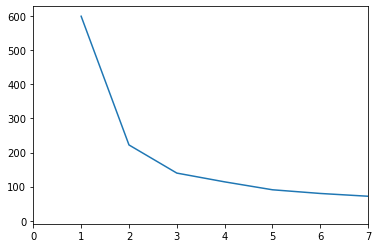

In [35]:
SSD=[]
for k in range(1,25):
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(x_scaled)
    SSD.append(kmeans.inertia_)
plt.plot(range(1,25),SSD)
plt.xlim([0,7]); #for magnification

**We choose the best value of k = 3.**

In [36]:
k_final=KMeans(n_clusters=3,random_state=10)
k_final.fit(x_scaled)
clusters=k_final.predict(x_scaled)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [37]:
k_final.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349]])